# Introduction


Milestone1

- Nama  : Muhammad Farhan Hendriyanto
- Batch : HCK-027

Project ini bertujuan untuk melakukan statistik deskriptif analisis, inferensial analisis, dan visualisasi dari penjualan supermarket store yang bertujuan utnuk meningkatkan penjualan agar bisa melakukan ekspansi cabang agar dengan cara yang strategis.


Link Tableau: https://public.tableau.com/views/P0M1_MuhammadFarhanHendriyanto/MainDashboard?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

# Problem Statement

**1. Link dataset:** https://www.kaggle.com/datasets/faresashraf1001/supermarket-sales

**2. Identifikasi Masalah**

 	Dalam dunia ritel modern, pengambilan keputusan terhadap suatu bisnis sangat berpengaruh besar dengan impact yang akan terjadi pada perkembangan bisnis tersebut. Dalam mengambil keputusan bisnis tidak bisa hanya dengan mengandalkan intuisi ataupun feeling saja, tetapi juga harus didasari oleh data, informasi dan analisis yang tajam serta akurat. Supermarket merupakan salah satu ritel yang dinamis, menghadapi tantangan dalam memahami perilaku konsumen, mengelola peforma penjualan, dan mengoptimalkan strategi pemasaran. Pada analisis kali ini, terdapat seorang client yang merupakan manager sales & marketing dari supermarket yang memiliki jaringan yang cukup besar. Beliau ingin melihat bagaimana pola penjualan, trend, dan performa tiap cabang yang ada pada perusahaanya tersebut. Tujuannya agar beliau bisa meningkatkan penjualan penjualan keseluruhan tiap cabangnya sebesar 15% dari penjualan sebelumnya dalam kurun waktu 1 bulan setelah penjualan terakhir, agar bisa melakukan ekspansi cabang secara strategis. Perusahaannya sudah menerapkan digitalisasi data dari transaksinya, namun sampai saat ini masih belum ada analisis mendalam yang menjawab pertanyaan penting seperti berikut:
	
    - Kapan waktu tertinggi dan terendah total penjualan terjadi?
    - Bagaimana persebaran gender customer yang sudah menjadi member? 
    - Kategori produk apa yang paling banyak terjual?
    - Kota mana yang memiliki performa penjualan terbaik?
    - Cabang mana yang mempunyai penjualan terendah?
    - Apakah gender mempengaruhi penjualan? 

**3. SMART dan Problem Statement.**

    - Specific: Meningkatkan penjualan penjualan di setiap cabang supermarket
    - Measurable: Meningkatkan pendapatan sebesar 15% dari penjualan terakhir.
    - Achievable: Target ini bisa tercapai apabila tiap cabang melakukan melakukan penjualan lebih besar dari sebelumnya.
    - Relevant: Apabila target dapat tercapai, keuntungan bisa menambah biaya agar perusahaan dapat melakukan ekspansi lagi.
    - Time-bound: Meningkatkan penjualan dalam kurun waktu 1 bulan setelah analisa.

    Problem statement:
    Bagaimana cara meningkatkan penjualan sebesar 15% dibandingkan penjualan terakhir dalam waktu 1 bulan setelah analisa ini selesai, agar perusahaan bisa melakukan ekspansi cabang secara strategis?

**4. Siapa audiens-nya?**
Manager sales & marketing untuk menyusun strategi promosi yang lebih tepat sasaran.

# Data Loading

In [1]:
# Import library
import pandas as pd
import plotly.express as px
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt

In [2]:
# load data
Data = pd.read_csv("D:\Hacktiv8\Phase 0\Milestone\p0-ftds027-hck-m1-MFarhanH\POM1_MuhammadFarhan_Hendriyanto\supermarket_sales - Sheet1.csv",sep=";")
Data.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,101-17-6199,A,Yangon,Normal,Male,Food and beverages,45.79,7,160.265,3.365.565,3/13/2019,19:44,Credit card,320.53,4.761.904.762,160.265,7.0
1,101-81-4070,C,Naypyitaw,Member,Female,Health and beauty,62.82,2,6.282,131.922,1/17/2019,12:36,Ewallet,125.64,4.761.904.762,6.282,4.9
2,102-06-2002,C,Naypyitaw,Member,Male,Sports and travel,25.25,5,63.125,1.325.625,3/20/2019,17:52,Cash,126.25,4.761.904.762,63.125,6.1
3,102-77-2261,C,Naypyitaw,Member,Male,Health and beauty,65.31,7,228.585,4.800.285,03/05/2019,18:02,Credit card,457.17,4.761.904.762,228.585,4.2
4,105-10-6182,A,Yangon,Member,Male,Fashion accessories,21.48,2,2.148,45.108,2/27/2019,12:22,Ewallet,42.96,4.761.904.762,2.148,6.6
5,105-31-1824,A,Yangon,Member,Male,Sports and travel,69.52,7,24.332,510.972,02/01/2019,15:10,Credit card,486.64,4.761.904.762,24.332,8.5
6,106-35-6779,A,Yangon,Member,Male,Home and lifestyle,44.34,2,4.434,93.114,3/27/2019,11:26,Cash,88.68,4.761.904.762,4.434,5.8
7,109-28-2512,B,Mandalay,Member,Female,Fashion accessories,97.61,6,29.283,614.943,01/07/2019,15:01,Ewallet,585.66,4.761.904.762,29.283,9.9
8,109-86-4363,B,Mandalay,Member,Female,Sports and travel,60.08,7,21.028,441.588,2/14/2019,11:36,Credit card,420.56,4.761.904.762,21.028,4.5
9,110-05-6330,C,Naypyitaw,Normal,Female,Food and beverages,39.43,6,11.829,248.409,3/25/2019,20:18,Credit card,236.58,4.761.904.762,11.829,9.4


In [3]:
# lihat kolom apa saja yang ada pada data
Data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

Penjelasan nama kolom:

- Branch: Lokasi cabang supermarket (misalnya, Yangon, Naypyitaw, Mandalay).
- City: Kota tempat cabang supermarket berada.
- Customer Type: Menunjukkan apakah pelanggan merupakan 'Member' (anggota) atau 'Normal' (biasa).
- Gender: Jenis kelamin pelanggan.
- Product Line: Kategori produk yang dijual (misalnya, Kesehatan & Kecantikan, Aksesori Elektronik, Rumah & Gaya Hidup).
- Unit Price: Harga per unit produk.
- Quantity: Jumlah barang yang dibeli.
- Tax 5%: Jumlah pajak yang dikenakan pada transaksi dengan tarif 5%.
- Total: Total jumlah transaksi termasuk pajak.
- Date: Tanggal transaksi.
- Time: Waktu transaksi.
- Payment: Metode pembayaran yang digunakan (misalnya, Tunai, Dompet Digital, Kartu Kredit).
- COGS: Biaya pokok penjualan, yaitu biaya dasar dari produk yang dijual.
- Gross Margin Percentage: Persentase keuntungan tetap dari setiap penjualan (4,7619%).
- Gross Income: Keuntungan yang diperoleh dari transaksi.
- Rating: Penilaian kepuasan pelanggan (skala 1 sampai 10).

In [4]:
# melihat bentuk data
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1002 non-null   object 
 1   Branch                   1002 non-null   object 
 2   City                     1001 non-null   object 
 3   Customer type            1001 non-null   object 
 4   Gender                   1002 non-null   object 
 5   Product line             1002 non-null   object 
 6   Unit price               1001 non-null   float64
 7   Quantity                 1002 non-null   int64  
 8   Tax 5%                   1001 non-null   float64
 9   Total                    1002 non-null   object 
 10  Date                     1002 non-null   object 
 11  Time                     1002 non-null   object 
 12  Payment                  1002 non-null   object 
 13  cogs                     1001 non-null   float64
 14  gross margin percentage 

Dari sini bisa dilihat bahwa data memiliki 16 kolom ('Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating). Data juga memiliki nilai non-null yang tidak konsisten, ini menandakan ada data yang memilki missing value.

# Data Cleaning

In [5]:
# membuat df baru untuk mempermudah cleaning data
df = Data.drop(columns=['Tax 5%','Total', 'cogs', 'gross margin percentage', 'gross income'])

In [6]:
# melihat kolom apa saja yang memiliki nilai null dan melihat tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1002 non-null   object 
 1   Branch         1002 non-null   object 
 2   City           1001 non-null   object 
 3   Customer type  1001 non-null   object 
 4   Gender         1002 non-null   object 
 5   Product line   1002 non-null   object 
 6   Unit price     1001 non-null   float64
 7   Quantity       1002 non-null   int64  
 8   Date           1002 non-null   object 
 9   Time           1002 non-null   object 
 10  Payment        1002 non-null   object 
 11  Rating         1001 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 94.1+ KB


In [7]:
# melihat jumlah nilai null
df.isna().sum()

Invoice ID       0
Branch           0
City             1
Customer type    1
Gender           0
Product line     0
Unit price       1
Quantity         0
Date             0
Time             0
Payment          0
Rating           1
dtype: int64

In [8]:
# menampilkan kolom apa saja yang memiliki nilai null
df[df.isna().any(axis=1)]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
1000,899-01-28,B,Yangon,NaN,Male,Home and lifestyle,NaN,3,3/20/2019,13:00,Cash,8.0
1001,900-01-29,C,NaN,Member,Female,Food and beverages,63.41,7,04/01/2019,17:59,Ewallet,NaN


In [9]:
# Handling missing value
df.dropna(inplace=True)

In [10]:
# cek kembali missing value
df.isna().sum()

Invoice ID       0
Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Date             0
Time             0
Payment          0
Rating           0
dtype: int64

In [11]:
#Menghitung ulang Tax 5% (Tax = 5% dari Unit Price * Quantity)
df['new_Tax 5%'] = df['Unit price'] * df['Quantity'] * 0.05

#Menghitung Total (Total = Unit Price * Quantity + Tax 5%)
df['new_Total'] = df['Unit price'] * df['Quantity'] + df['new_Tax 5%']

#Menghitung ulang Gross Income (Gross Income = 5% dari Total)
df['new_gross income'] = df['new_Tax 5%']

#Menghitung ulang COGS (COGS = Total - Gross Income)
df['new_cogs'] = df['new_Total'] - df['new_gross income']

#Menghitung ulang Gross Margin Percentage (Gross Income / Total * 100)
df['new_gross margin percentage'] = (df['new_gross income'] / df['new_Total']) * 100

#Membulatkan angka
df['new_Tax 5%'] = df['new_Tax 5%'].round(2)
df['new_Total'] = df['new_Total'].round(2)
df['new_gross income'] = df['new_gross income'].round(2)
df['new_cogs'] = df['new_cogs'].round(2)
df['new_gross margin percentage'] = df['new_gross margin percentage'].round(2)

In [12]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating,new_Tax 5%,new_Total,new_gross income,new_cogs,new_gross margin percentage
0,101-17-6199,A,Yangon,Normal,Male,Food and beverages,45.79,7,3/13/2019,19:44,Credit card,7.0,16.03,336.56,16.03,320.53,4.76
1,101-81-4070,C,Naypyitaw,Member,Female,Health and beauty,62.82,2,1/17/2019,12:36,Ewallet,4.9,6.28,131.92,6.28,125.64,4.76
2,102-06-2002,C,Naypyitaw,Member,Male,Sports and travel,25.25,5,3/20/2019,17:52,Cash,6.1,6.31,132.56,6.31,126.25,4.76
3,102-77-2261,C,Naypyitaw,Member,Male,Health and beauty,65.31,7,03/05/2019,18:02,Credit card,4.2,22.86,480.03,22.86,457.17,4.76
4,105-10-6182,A,Yangon,Member,Male,Fashion accessories,21.48,2,2/27/2019,12:22,Ewallet,6.6,2.15,45.11,2.15,42.96,4.76


In [13]:
# mengubah tipe data
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M')
df['Month'] = pd.to_datetime(df['Date'], format='%M')
df['Year'] = pd.to_datetime(df['Date'], format='%Y')
df['Week'] = df['Date'].dt.to_period('W').dt.start_time
df['new_Total'] = pd.to_numeric(df['new_Total'], errors='coerce')
df['Gender_code'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [14]:
df['Day'] = df['Date'].dt.day_name()
df['Week'] = df['Date'].dt.day_of_week
df['Month'] = df['Date'].dt.month_name()
df['Year'] = df['Date'].dt.year

In [15]:
# cek data duplikat
df.duplicated().value_counts()

False    1000
Name: count, dtype: int64

In [16]:
df[df.isna().any(axis=1)]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,...,new_Tax 5%,new_Total,new_gross income,new_cogs,new_gross margin percentage,Month,Year,Week,Gender_code,Day


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Invoice ID                   1000 non-null   object        
 1   Branch                       1000 non-null   object        
 2   City                         1000 non-null   object        
 3   Customer type                1000 non-null   object        
 4   Gender                       1000 non-null   object        
 5   Product line                 1000 non-null   object        
 6   Unit price                   1000 non-null   float64       
 7   Quantity                     1000 non-null   int64         
 8   Date                         1000 non-null   datetime64[ns]
 9   Time                         1000 non-null   datetime64[ns]
 10  Payment                      1000 non-null   object        
 11  Rating                       1000 non-null   floa

In [18]:
df.to_excel("Data Supermart Clean.xlsx", index=False)

Pada proses ini, dilakukan penghitungan ulang terkait dengan beberapa kolom tertentu karena pada kolom yang sama sebelumnya, data memiliki karakteristik penempatan format yang kurang tepat, sehingga data dibersihkan dengan cara membuat kolom baru dengan mengisinya berdasarkan dengan rumus/pola data sebelumnya dan merubahnya menjadi lebih readable.

Pada proses ini juga data dilakukan cleaning dengan cara merubah tipe data menjadi tipe yang umum dipakai, sprti Date menjadi Datetime dan lain sebagainya. Kemudian juga kolom Date dipecah menjadi beberapa waktu bagian tujuannya adalah agar mempermudah analisis lebih lanjut.

# Data Exploration & Analysis

## 1. Visualisasi Line Chart

1. Analisis waktu tertinggi dan Terendah Penjualan

In [19]:
a = 1000.01231
print(f'{a:,.2f}')

1,000.01


In [20]:
# grouping total penjualan per hari
daily_sales = df.groupby('Date')['new_Total'].sum().reset_index()

# Visualisasi penjualan harian (seluruh waktu)
fig = px.line(daily_sales, x='Date', y='new_Total', title='Total Penjualan Harian (Keseluruhan)', labels={'Date': 'Tanggal', 'new_Total': 'Total Penjualan'}, markers=True)
fig.update_layout(xaxis_tickangle=45)
fig.show()

c:\Users\farha\AppData\Local\Programs\Python\Python311\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


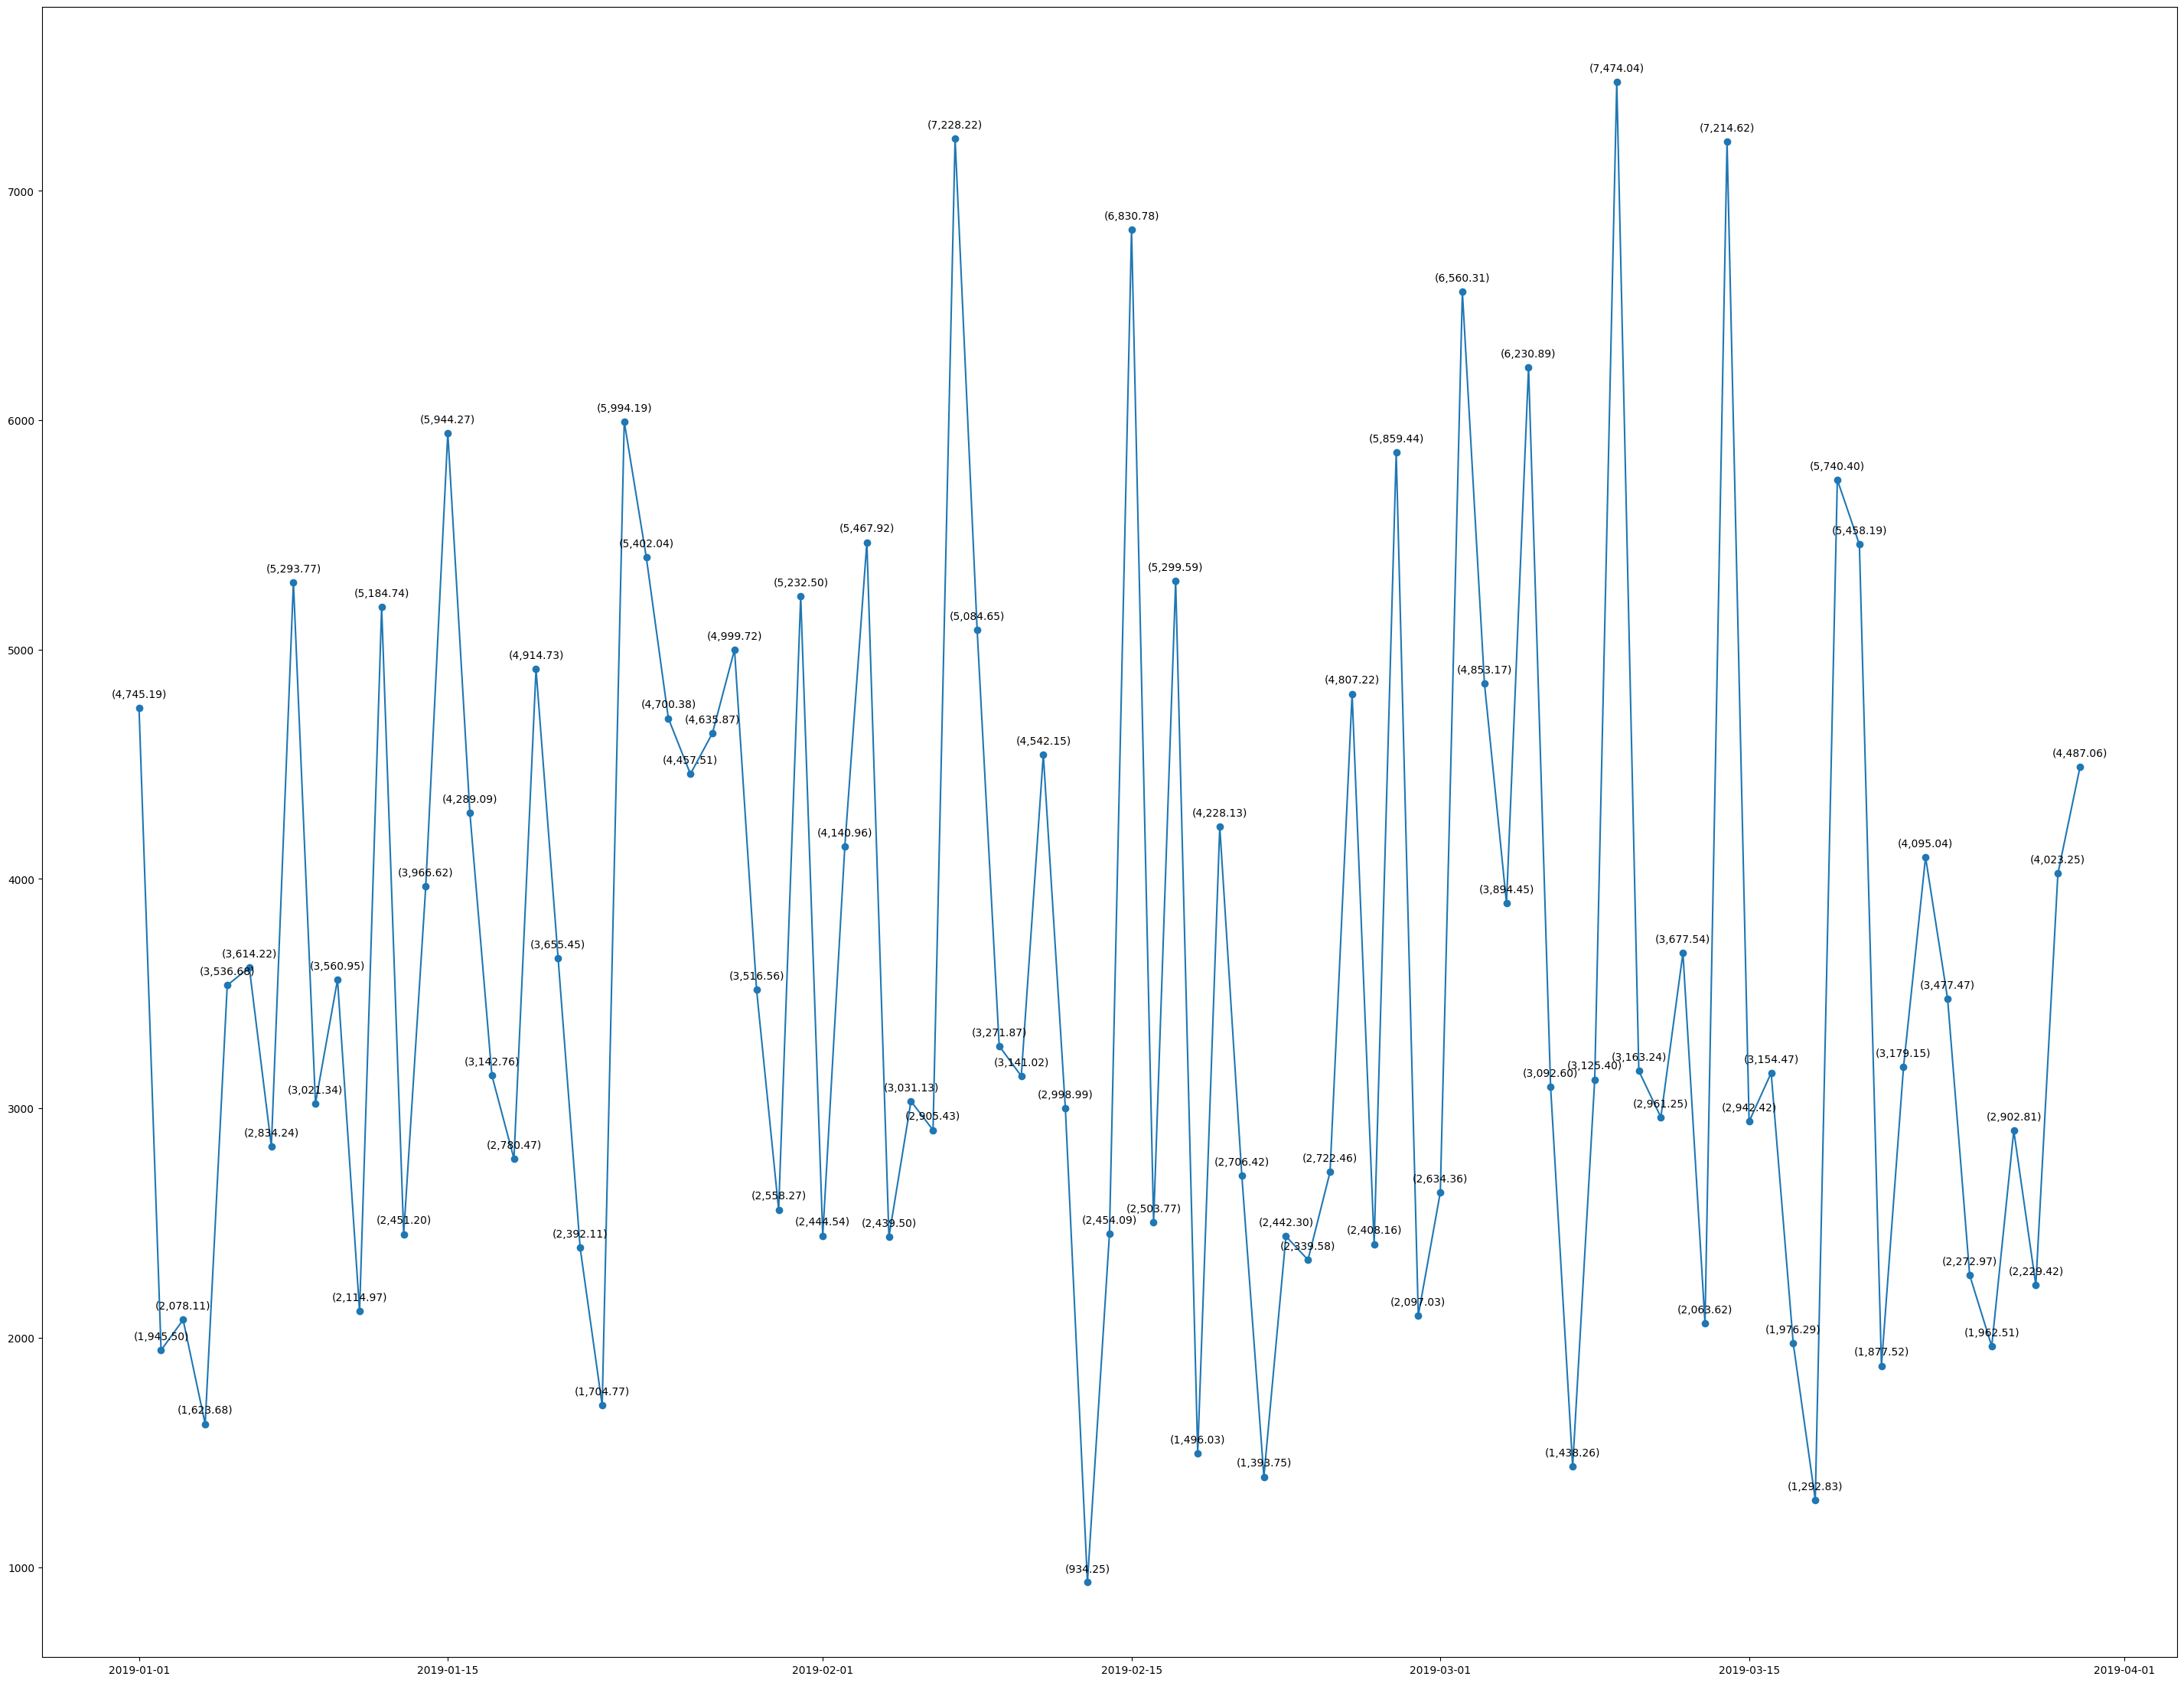

In [21]:
# grouping total penjualan per hari
daily_sales = df.groupby('Date')['new_Total'].sum().reset_index()

plt.figure(figsize= (36,28))
plt.plot(daily_sales['Date'],daily_sales['new_Total'], marker='o', linestyle = '-')

# add annotation
for i, (xi, yi) in enumerate(zip(daily_sales['Date'],daily_sales['new_Total'])):
    plt.annotate(f'({yi:,.2f})', (xi,yi), textcoords = 'offset points', xytext = (0,10), ha='center')

# plt.plot(daily_sales['Date'],daily_sales['new_Total'])
plt.show()

Dari sini bisa dilihat bahwa penjualan tertinggi terjadi pada tanggal 09 maret 2019 sebesar $7,474.04, sedangkan penjualan terendah ada pada tanggal 13 Februari 2019 sebesar $934.25. 

2. Persebaran Gender Customer yang sudah member

In [22]:
# hitung persebaran gender yang sudah menjadi member
df_member = df[df['Customer type'] == 'Member']
df_member.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,...,new_Tax 5%,new_Total,new_gross income,new_cogs,new_gross margin percentage,Month,Year,Week,Gender_code,Day
1,101-81-4070,C,Naypyitaw,Member,Female,Health and beauty,62.82,2,2019-01-17,1900-01-01 12:36:00,...,6.28,131.92,6.28,125.64,4.76,January,2019,3,1,Thursday
2,102-06-2002,C,Naypyitaw,Member,Male,Sports and travel,25.25,5,2019-03-20,1900-01-01 17:52:00,...,6.31,132.56,6.31,126.25,4.76,March,2019,2,0,Wednesday
3,102-77-2261,C,Naypyitaw,Member,Male,Health and beauty,65.31,7,2019-03-05,1900-01-01 18:02:00,...,22.86,480.03,22.86,457.17,4.76,March,2019,1,0,Tuesday
4,105-10-6182,A,Yangon,Member,Male,Fashion accessories,21.48,2,2019-02-27,1900-01-01 12:22:00,...,2.15,45.11,2.15,42.96,4.76,February,2019,2,0,Wednesday
5,105-31-1824,A,Yangon,Member,Male,Sports and travel,69.52,7,2019-02-01,1900-01-01 15:10:00,...,24.33,510.97,24.33,486.64,4.76,February,2019,4,0,Friday


In [23]:
# Membuat Pie chart
fig = px.pie(
    df_member,
    names='Gender',
    title='Persebaran Gender Customer yang Sudah Menjadi Member',
    hole=0.5,  # untuk tampilkan seperti donut chart
)
fig.update_traces(textinfo='percent+label')
fig.show()

In [24]:
Grouping_gender = df_member.groupby('Gender')['Invoice ID'].count().reset_index()
Grouping_gender.head()

,Gender,Invoice ID
0,Female,261
1,Male,240


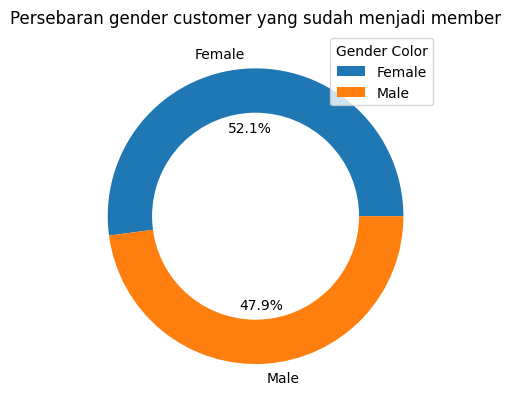

In [25]:
# Create a pie chart
plt.pie(Grouping_gender['Invoice ID'], labels=Grouping_gender['Gender'], autopct='%1.1f%%')

# Adding circle in pie chart
centre_circle = plt.Circle((0,0),0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Adding title
plt.title('Persebaran gender customer yang sudah menjadi member')

# Adding legend
plt.legend(Grouping_gender['Gender'], loc='upper right', title= 'Gender Color')
plt.show()

Berdasarkan hasil kalkulasi di atas, dapat dilihat bahwa customer yang sudah menjadi member lebih banyak perempuan(52.1%) dibandingkan dengan laki(47.9%). 

3. Produk yang paling banyak terjual

In [26]:
produk_terjual_terbanyak = df.groupby('Product line')['Quantity'].sum().reset_index().sort_values('Quantity', ascending=False)

In [27]:
fig = px.bar(produk_terjual_terbanyak, x='Product line', y='Quantity', title='Penjualan Produk per Kategori',
             labels={'Product line': 'Kategori Produk', 'Quantity': 'Jumlah Terjual'},
             color='Quantity')
fig.show()

In [28]:
produk_terjual_terbanyak = df.groupby('Product line')['Quantity'].sum().reset_index().sort_values('Quantity', ascending=False)
produk_terjual_terbanyak.head()

,Product line,Quantity
0,Electronic accessories,971
2,Food and beverages,952
5,Sports and travel,920
4,Home and lifestyle,911
1,Fashion accessories,902


[Text(0, 0, '971'),
 Text(0, 0, '952'),
 Text(0, 0, '920'),
 Text(0, 0, '911'),
 Text(0, 0, '902'),
 Text(0, 0, '854')]

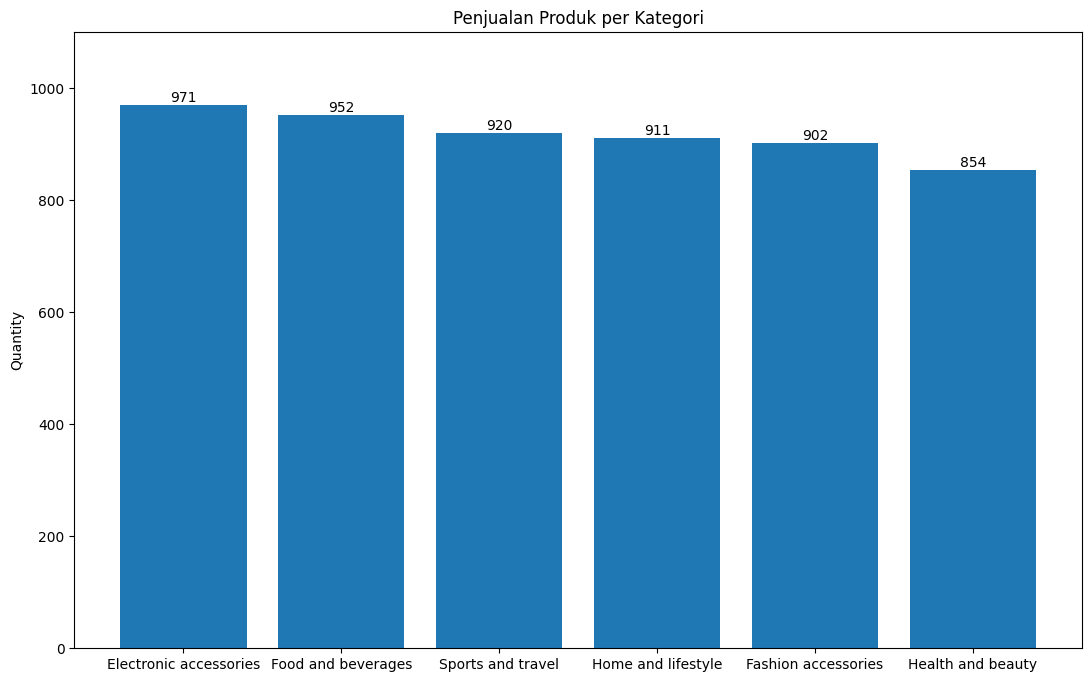

In [29]:
fig,ax= plt.subplots(figsize=(13,8))
bar_container = ax.bar(produk_terjual_terbanyak['Product line'], produk_terjual_terbanyak['Quantity'])
ax.set(ylabel='Quantity', title='Penjualan Produk per Kategori', ylim=(0,1100))
ax.bar_label(bar_container)

secara keseluruhan, kategori produk yang paling banyak terjual adalah Electronic accessories sebesar 971 unit. Oleh karena itu, mungkin ktia bisa meningkatkan strategi penjualan pada electronic accessories, karena F & B ada di posisi kedua, kita bisa membuat promosi atau campaign terhadap F&B yang digabungkan dengan Health and Beauty.


4. Kota mana dengan penjualan terbanyak

In [30]:
# grup berdasarkan kota
kota_penjualan_terbanyak = round(df.groupby('City')['new_Total'].sum().reset_index().sort_values(by='new_Total',ascending=False))

In [31]:
# visualisasi bar chart
fig = px.bar(kota_penjualan_terbanyak, x='City', y='new_Total', title='Total Penjualan per Kota',
             labels={'City': 'Kota', 'new_Total': 'Total Penjualan'}, color='new_Total')
fig.show()

In [32]:
# grup berdasarkan kota
kota_penjualan_terbanyak = round(df.groupby('City')['new_Total'].sum().reset_index().sort_values(by='new_Total',ascending=False))
kota_penjualan_terbanyak.head()

,City,new_Total
1,Naypyitaw,110569.0
2,Yangon,106200.0
0,Mandalay,106198.0


[Text(0, 0, '110,569'), Text(0, 0, '106,200'), Text(0, 0, '106,198')]

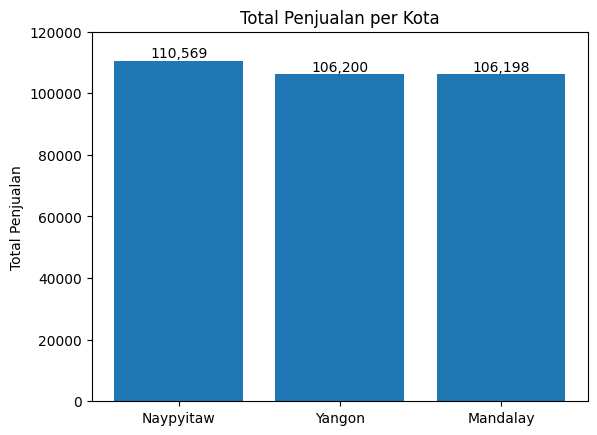

In [33]:
fig,ax = plt.subplots()
bar_container =ax.bar(kota_penjualan_terbanyak['City'], kota_penjualan_terbanyak['new_Total'])
ax.set(ylabel='Total Penjualan', title='Total Penjualan per Kota', ylim=(0,120000))
ax.bar_label(bar_container, fmt='{:,.0f}')

Berdasarkan hasil data ini, dapat dilihat bahwa Naypyitaw merupakan kota dengan penjualan terbanyak, yakni 110.569. Oleh karena itu, kita bisa melihat kota mana yang memberikan kontribusi terbesar terhadap total penjualan. Jika ada kota dengan penjualan rendah, kita dapat mmelihat dan mempelajari lebih lanjut apakah ada masalah dalam distribusi atau strategi pemasaran yang diterapkan di kota tersebut.

# 2. Statistik Deskriptif

Cabang mana yang penjualannya paling rendah?

Cabang A

In [34]:
# Filter berdasarkan cabang
df_cabang_A = df[df['Branch'] == 'A']
df_cabang_B = df[df['Branch'] == 'B']
df_cabang_C = df[df['Branch'] == 'C']

In [35]:
print("="*30, 'Total Terjual', "="*30)
mean_A = df_cabang_A['new_Total'].mean()
mean_B = df_cabang_B['new_Total'].mean()
mean_C = df_cabang_C['new_Total'].mean()

median_A = df_cabang_A['new_Total'].median()
median_B = df_cabang_B['new_Total'].median()
median_C = df_cabang_C['new_Total'].median()

sum_A = df_cabang_A['new_Total'].sum()
sum_B = df_cabang_B['new_Total'].sum()
sum_C = df_cabang_C['new_Total'].sum()

min_A = df_cabang_A['new_Total'].min()
min_B = df_cabang_B['new_Total'].min()
min_C = df_cabang_C['new_Total'].min()

max_A = df_cabang_A['new_Total'].max()
max_B = df_cabang_B['new_Total'].max()
max_C = df_cabang_C['new_Total'].max()

print()
print(f'Mean A: {mean_A:,.2f}')
print(f'Mean B: {mean_B:,.2f}')
print(f'Mean C: {mean_C:,.2f}')

print()
print(f'median A: {median_A:,.2f}')
print(f'median B: {median_B:,.2f}')
print(f'median C: {median_C:,.2f}')

print()
print(f'sum A: {sum_A:,.2f}')
print(f'sum B: {sum_B:,.2f}')
print(f'sum C: {sum_C:,.2f}')

print()
print(f'min A: {min_A:,.2f}')
print(f'min B: {min_B:,.2f}')
print(f'min C: {min_C:,.2f}')

print()
print(f'max A: {max_A:,.2f}')
print(f'max B: {max_B:,.2f}')
print(f'max C: {max_C:,.2f}')



============================== Total Terjual ==============================

Mean A: 312.35
Mean B: 319.87
Mean C: 337.10

median A: 240.83
median B: 252.88
median C: 271.42

sum A: 106,200.33
sum B: 106,197.82
sum C: 110,568.68

min A: 12.69
min B: 18.64
min C: 10.68

max A: 1,039.29
max B: 1,022.49
max C: 1,042.65


In [36]:
print("="*30, 'Total Quantitas', "="*30)
mean_A = df_cabang_A['Quantity'].mean()
mean_B = df_cabang_B['Quantity'].mean()
mean_C = df_cabang_C['Quantity'].mean()

median_A = df_cabang_A['Quantity'].median()
median_B = df_cabang_B['Quantity'].median()
median_C = df_cabang_C['Quantity'].median()

sum_A = df_cabang_A['Quantity'].sum()
sum_B = df_cabang_B['Quantity'].sum()
sum_C = df_cabang_C['Quantity'].sum()

min_A = df_cabang_A['Quantity'].min()
min_B = df_cabang_B['Quantity'].min()
min_C = df_cabang_C['Quantity'].min()

max_A = df_cabang_A['Quantity'].max()
max_B = df_cabang_B['Quantity'].max()
max_C = df_cabang_C['Quantity'].max()

print()
print(f'Mean A: {mean_A:,.2f}')
print(f'Mean B: {mean_B:,.2f}')
print(f'Mean C: {mean_C:,.2f}')

print()
print(f'median A: {median_A:,.2f}')
print(f'median B: {median_B:,.2f}')
print(f'median C: {median_C:,.2f}')

print()
print(f'sum A: {sum_A:,.2f}')
print(f'sum B: {sum_B:,.2f}')
print(f'sum C: {sum_C:,.2f}')

print()
print(f'min A: {min_A:,.2f}')
print(f'min B: {min_B:,.2f}')
print(f'min C: {min_C:,.2f}')

print()
print(f'max A: {max_A:,.2f}')
print(f'max B: {max_B:,.2f}')
print(f'max C: {max_C:,.2f}')

============================== Total Quantitas ==============================

Mean A: 5.47
Mean B: 5.48
Mean C: 5.58

median A: 5.00
median B: 5.00
median C: 6.00

sum A: 1,859.00
sum B: 1,820.00
sum C: 1,831.00

min A: 1.00
min B: 1.00
min C: 1.00

max A: 10.00
max B: 10.00
max C: 10.00


Berdasarkan data di atas dapat diketahui bahwa:

- Rata-rata penjualan terendah terdapat pada cabang A.
- Jumlah penjualan terbesar adalah cabang C (hampir semua bidang). Namun, cabang A dan B berbeda sedikit, akan tetapi masih lebih besar Cabang A.
- Nilai minimum dan maksimum antar cabang juga sama, ini berarti transaksinya relatif mirip.
- Dari segi kuantitas penjualan terdapat perbandingan dengan penjualan yang dimana ditemukan bahwa jumlah penjualan bedasarkan 
    kuantitas paling besar berasal dari cabang A, sedangkan jumlah total penjualan paling besar adalah cabang C.



# 3. Statistik Inferensial

## Uji hipotesis pengaruh gender terhadap penjualan

In [37]:
# menghitung central tendency, sebaran data, dan bentuk distribusi data

# Hitung Rata-rata
print("Mean")
mean_newTotal = df['new_Total'].mean()
print(f'Rata-rata new_Total adalah: {mean_newTotal:.2f}')

print("="*50)

# Hitung Median
print("Median")
median_new_Total = df['new_Total'].median()
print(f' Median new_Total: {median_new_Total:.2f}')

print("="*50)

# Standar Deviasi
print("Standar Deviasi")
std_new_Total = df['new_Total'].std()
print(f'Standar Deviasi new_Total adalah: {std_new_Total:.2f}')

# menghitung kurtosis
# skewness
print("Skew")
skew_new_Total = df['new_Total'].skew()
print(f'skewness new_Total adalah: {skew_new_Total:.2f}')

print("="*50)

# Kurtosis
print("Kurtosis")
kurtosis_new_Total = df['new_Total'].kurtosis()
print(f'Kurtosis new_Total adalah: {kurtosis_new_Total:.2f}')

Mean
Rata-rata new_Total adalah: 322.97
Median
 Median new_Total: 253.85
Standar Deviasi
Standar Deviasi new_Total adalah: 245.89
Skew
skewness new_Total adalah: 0.89
Kurtosis
Kurtosis new_Total adalah: -0.08


Berdasarkan data dari central tendency dan sebaran data, dapat dilihat bahwa data penjualan (new_total) memiliki distribusi bersifat skew positif yang dimana memiliki arti mayoritas transaksi mempunyai nilai yang lebih kecil daripada meannya. Namun terdapat transaksi besar yang mendorong meannya ke atas. Oleh karena itu, karena data tidak berdistribusi normal, kita melakukan uji hipotesis menggunakan Mann-Whitney U Test untuk mengetahui apakah terdapat perbedaan tingkat pembelian berdasarkan gender.

H0 = Tidak terdapat perbedaan tingkat pembelian berdasarkan gender

H1 =  Terdapat perbedaan tingkat pembelian berdasarkan gender

In [38]:
# melakukan uji hipotesis dengan Mann-Whitney U
stat_mannwhitneyu, p_value_mannwhitneyu = mannwhitneyu(df['Gender_code'], df['new_Total'])

print(f"Statistik U: {stat_mannwhitneyu:.3f}")
print(f"P-value: {p_value_mannwhitneyu:.4f}")

Statistik U: 0.000
P-value: 0.0000


Berdasarkan hasil analisis deskriptif, data penjualan (new_Total) menunjukkan distribusi yang skew positif dengan mean lebih tinggi dari median, yang mengindikasikan adanya outlier atau transaksi bernilai besar yang menarik nilai rata-rata ke atas.

Karena distribusi tidak normal, maka dilakukan uji hipotesis non-parametrik Mann-Whitney U untuk menguji apakah terdapat perbedaan tingkat pembelian berdasarkan gender.

Hipotesis yang diuji:

H0: Tidak terdapat perbedaan tingkat pembelian berdasarkan gender

H1: Terdapat perbedaan tingkat pembelian berdasarkan gender

Hasil pengujian menunjukkan:

Statistik U: 0.000

P-value: 0.0000

Karena nilai P < 0.05, maka H0 ditolak. Artinya, terdapat perbedaan yang signifikan dalam tingkat pembelian antara kelompok gender. Dengan kata lain, gender berpengaruh terhadap tingkat pembelian customer dalam data ini.

# Kesimpulan

Berdasarkan analisis yang sudah dilakukan, kita dapat mengambil titik besarnya yaitu:

- Penjualan tertinggi terjadi pada tanggal 09 maret 2019 sebesar $7,474.04, sedangkan penjualan terendah ada pada tanggal 13 Februari 2019 sebesar $934.25. 

- Customer yang sudah menjadi member lebih banyak perempuan(52.1%) dibandingkan dengan laki(47.9%).

- secara keseluruhan, kategori produk yang paling banyak terjual adalah Electronic accessories sebesar 971 unit, 

- Berdasarkan hasil data ini, dapat dilihat bahwa Naypyitaw merupakan kota dengan penjualan terbanyak, yakni 110.569.

- Hasil analisis deskriptif menunjukkan bahwa Cabang A memiliki rata-rata penjualan terendah, sedangkan Cabang C unggul di hampir semua metrik, termasuk total dan rata-rata penjualan. Cabang A dan B memiliki total penjualan yang mirip, namun Cabang A sedikit lebih tinggi. Meskipun Cabang A mencatat kuantitas penjualan terbanyak, Cabang C tetap menghasilkan nilai penjualan tertinggi, kemungkinan karena produk dengan harga lebih tinggi.

- Berdasarkan hasil uji hipotesis menggunakan Mann-Whitney U Test, diperoleh P-value = 0.0000 yang menunjukkan bahwa terdapat perbedaan tingkat pembelian antara gender secara signifikan. Oleh karena itu, dapat disimpulkan bahwa gender merupakan salah satu faktor yang berpengaruh terhadap tingkat pembelian customer.

# Rekomendasi

Berdasarkan kesimpulan yang telah didapatkan, kita bisa meningkatkan promosi pada tanggal atau waktu tertentu, misalnya dengan membuat promo musiman atau event khusus. Kita juga bisa memperkuat penjualan pada sektor Electronic accessories dengan menempatkan produk tersebut di lokasi strategis dalam toko.

Karena Naypyitaw merupakan kota dengan total penjualan tertinggi, maka performa penjualan di kota tersebut dapat terus ditingkatkan dengan menambah stok, layanan, hingga ekspansi cabang di sekitar daerah tersebut.

Terkait performa antar cabang yang sudah ada, Cabang A dan B perlu dievaluasi secara menyeluruh karena penjualannya tidak sebaik dan tidak se konsisten Cabang C, yang unggul di hampir semua metrik. Strategi penjualan Cabang C bisa dijadikan acuan dalam menyusun ulang strategi bisnis untuk Cabang A dan B.

Selain itu, berdasarkan hasil uji hipotesis Mann-Whitney U, ditemukan bahwa gender memiliki pengaruh signifikan terhadap tingkat pembelian. Oleh karena itu, strategi marketing ke depan dapat mempertimbangkan perbedaan perilaku pembelian antara konsumen laki-laki dan perempuan, misalnya melalui segmentasi promosi, produk, atau loyalty program.

Namun demikian, strategi tidak hanya perlu berfokus pada gender, tetapi juga harus mempertimbangkan faktor lain seperti kategori produk, waktu pembelian, loyalitas pelanggan, dan efektivitas promosi untuk mendorong peningkatan penjualan secara menyeluruh.